# Comparison of Machine Learning Classifiers


This project aims to compare the performance of various classifiers using synthetic data generated with **make_classification** from **sklearn.datasets**. The classifiers are evaluated based on their accuracy scores using a train-test split approach.

<ul style="list-style-type: disc;">
    <li><b>Data Generation</b>: Synthetic data with 1000 samples, 5 features, and 2 classes is generated using make_classification.</li>
    <li><b>Train-Test Split</b>: The data is split into training and testing sets with an 80-20 ratio using train_test_split from sklearn.model_selection.</li>
    <li><b>Classifier Selection</b>: Thirteen different classifiers are selected from sklearn library, including k-Nearest Neighbors, Support Vector Machines with various kernels, Gaussian Process, Gradient Boosting, Decision Trees, Extra Trees, Random Forest, Neural Network, AdaBoost, Naive Bayes, Quadratic Discriminant Analysis, and Stochastic Gradient Descent.</li>
    <li><b>Model Training/<b>: Each classifier is trained using the training data.</li>
    <li><b>Model Evaluation</b>: The accuracy scores of all classifiers are computed using the testing data.</li>
    <li><b>Visualization</b>: The accuracy scores of the classifiers are visualized using a horizontal bar plot, providing a comparative analysis of their performance.</li>
</ul>

## 1. Create a synthetic dataset

#### 1.1 Generate the set

In [52]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

#### 1.2 Short dataset examination

In [53]:
X.shape, Y.shape

((1000, 5), (1000,))

## 2. Splitting data

#### 2.1 Data split

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

#### 2.2 Data dimension examination

In [55]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [56]:
X_test.shape, Y_test.shape

((200, 5), (200,))

## 3 Building Classification Models

#### 3.1 Importing modules

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

#### 3.2 Defining modules

In [58]:
classifiers = {
    "Nearest_Neighbors": KNeighborsClassifier(3),
    "Linear_SVM": SVC(kernel="linear", C=0.025),
    "Polynomial_SVM": SVC(kernel="poly", degree=3, C=0.025),
    "RBF_SVM": SVC(kernel="rbf", C=1, gamma=2),
    "Gaussian_Process": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Gradient_Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    "Decision_Tree": DecisionTreeClassifier(max_depth=5),
    "Extra_Trees": ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    "Random_Forest": RandomForestClassifier(max_depth=5, n_estimators=100),
    "Neural_Net": MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Naive_Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "SGD": SGDClassifier(loss="hinge", penalty="l2")
}

#### 3.3 Building, training and recording accuracy scores

In [59]:
scores = list()

for name, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    score = classifier.score(X_test, Y_test)
    scores.append(score)
    
scores

[0.845,
 0.86,
 0.805,
 0.825,
 0.87,
 0.85,
 0.84,
 0.865,
 0.885,
 0.875,
 0.855,
 0.865,
 0.865,
 0.78]

## 4. Analysis of models' performances

#### 4.1 Creating Pandas data frame

In [60]:
import pandas as pd

df = pd.DataFrame({"name": classifiers.keys(), "score": scores})
df

,name,score
0,Nearest_Neighbors,0.845
1,Linear_SVM,0.860
2,Polynomial_SVM,0.805
3,RBF_SVM,0.825
4,Gaussian_Process,0.870
5,Gradient_Boosting,0.850
6,Decision_Tree,0.840
7,Extra_Trees,0.865
8,Random_Forest,0.885
9,Neural_Net,0.875


#### 4.2 Applying color formatting to the data frame and plotting the result

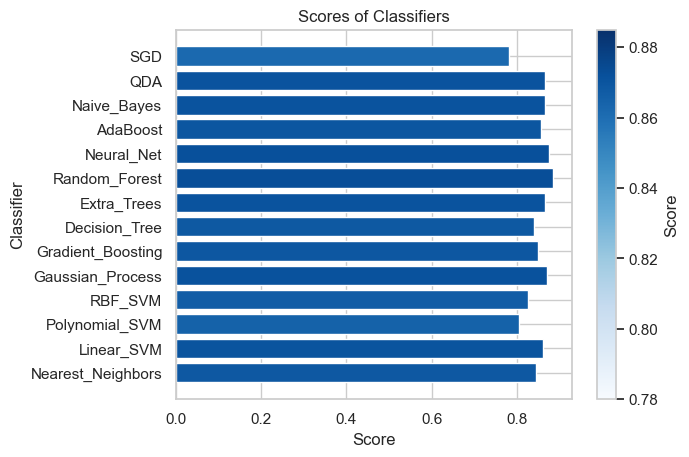

In [61]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax = plt.subplots()

sm = cm.ScalarMappable(cmap=plt.cm.Blues)
sm.set_array(df["score"])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Score")

bars = ax.barh(df["name"], df["score"], color=plt.cm.Blues(df["score"]))

ax.set_xlabel("Score")
ax.set_ylabel("Classifier")
ax.set_title("Scores of Classifiers")

plt.show()